In [563]:
!pip install geopy
!pip install yellowbrick
!pip install matplotlip

You should consider upgrading via the 'C:\Users\leano\Desktop\Studium\git\ML\BA_ClusteringofRestaurants\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\leano\Desktop\Studium\git\ML\BA_ClusteringofRestaurants\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\leano\Desktop\Studium\git\ML\BA_ClusteringofRestaurants\Scripts\python.exe -m pip install --upgrade pip' command.


In [564]:
# Clustering for Vancouver
import pandas as pd
import re
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


# load total population of each Vancouver neighbourhood
income_path = pd.read_csv('dataset_Vancouver/income_Vancouver1.csv', index_col= 'Total income')
df_income = pd.DataFrame(income_path)
df_income.loc['Total',:]= df_income.sum(axis=0)
df_income

,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,Kitsilano,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
Total income,,,,,,,,,,,,,,,,,,,,,
Under $10.000 (including loss),2790.0,8785.0,3320.0,3185.0,3300.0,4575.0,6595.0,2285.0,4160.0,4960.0,...,2705.0,1190.0,920.0,1530.0,5155.0,4840.0,5920.0,2020.0,86590.0,338730.0
$10.000 to $19.999,1820.0,8050.0,2140.0,3495.0,5305.0,6315.0,8580.0,1650.0,4700.0,4945.0,...,2860.0,665.0,815.0,3430.0,6800.0,5720.0,7225.0,1370.0,95255.0,346355.0
$20.000 to $29.999,1365.0,4830.0,1615.0,3110.0,3420.0,4390.0,5885.0,1295.0,3165.0,3875.0,...,2260.0,650.0,750.0,1080.0,4585.0,3940.0,5685.0,985.0,66640.0,248170.0
$30.000 to $39.999,1110.0,4325.0,1205.0,2955.0,2945.0,3185.0,4820.0,865.0,2570.0,3435.0,...,1870.0,475.0,565.0,575.0,3600.0,3085.0,4925.0,845.0,54720.0,210570.0
$40.000 to $49.999,860.0,4270.0,1130.0,3030.0,2590.0,2580.0,3865.0,795.0,2225.0,3510.0,...,1760.0,490.0,495.0,435.0,2850.0,2360.0,4860.0,785.0,48860.0,188140.0
$50.000 to $59.999,700.0,3700.0,1025.0,2630.0,1955.0,1895.0,2915.0,680.0,1735.0,3110.0,...,1310.0,380.0,450.0,385.0,1820.0,1615.0,3825.0,690.0,38355.0,149530.0
$60.000 to $69.999,620.0,3530.0,820.0,2370.0,1545.0,1465.0,1965.0,670.0,1320.0,2410.0,...,1075.0,350.0,400.0,200.0,1240.0,1065.0,2945.0,500.0,30150.0,115955.0
$70.000 to $79.999,470.0,3115.0,705.0,1980.0,1170.0,1155.0,1490.0,460.0,950.0,2160.0,...,930.0,270.0,385.0,210.0,780.0,780.0,2385.0,555.0,24120.0,89390.0
$80.000 to $89.999,415.0,2495.0,635.0,1625.0,850.0,730.0,1245.0,370.0,910.0,1805.0,...,785.0,285.0,315.0,210.0,670.0,640.0,1660.0,450.0,19175.0,71045.0


In [565]:
df_income = df_income.drop(["$100.000 and over"], axis = 0)
lst =[]
for i in range(10):
    lst.append(10000*i+5000)
lst.append(125000)
lst.append(250000)
lst.append(sum(lst)/len(lst))
df_income.insert(0,'average income', lst)
df_income

,average income,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
Total income,,,,,,,,,,,,,,,,,,,,,
Under $10.000 (including loss),5000.000000,2790.0,8785.0,3320.0,3185.0,3300.0,4575.0,6595.0,2285.0,4160.0,...,2705.0,1190.0,920.0,1530.0,5155.0,4840.0,5920.0,2020.0,86590.0,338730.0
$10.000 to $19.999,15000.000000,1820.0,8050.0,2140.0,3495.0,5305.0,6315.0,8580.0,1650.0,4700.0,...,2860.0,665.0,815.0,3430.0,6800.0,5720.0,7225.0,1370.0,95255.0,346355.0
$20.000 to $29.999,25000.000000,1365.0,4830.0,1615.0,3110.0,3420.0,4390.0,5885.0,1295.0,3165.0,...,2260.0,650.0,750.0,1080.0,4585.0,3940.0,5685.0,985.0,66640.0,248170.0
$30.000 to $39.999,35000.000000,1110.0,4325.0,1205.0,2955.0,2945.0,3185.0,4820.0,865.0,2570.0,...,1870.0,475.0,565.0,575.0,3600.0,3085.0,4925.0,845.0,54720.0,210570.0
$40.000 to $49.999,45000.000000,860.0,4270.0,1130.0,3030.0,2590.0,2580.0,3865.0,795.0,2225.0,...,1760.0,490.0,495.0,435.0,2850.0,2360.0,4860.0,785.0,48860.0,188140.0
$50.000 to $59.999,55000.000000,700.0,3700.0,1025.0,2630.0,1955.0,1895.0,2915.0,680.0,1735.0,...,1310.0,380.0,450.0,385.0,1820.0,1615.0,3825.0,690.0,38355.0,149530.0
$60.000 to $69.999,65000.000000,620.0,3530.0,820.0,2370.0,1545.0,1465.0,1965.0,670.0,1320.0,...,1075.0,350.0,400.0,200.0,1240.0,1065.0,2945.0,500.0,30150.0,115955.0
$70.000 to $79.999,75000.000000,470.0,3115.0,705.0,1980.0,1170.0,1155.0,1490.0,460.0,950.0,...,930.0,270.0,385.0,210.0,780.0,780.0,2385.0,555.0,24120.0,89390.0
$80.000 to $89.999,85000.000000,415.0,2495.0,635.0,1625.0,850.0,730.0,1245.0,370.0,910.0,...,785.0,285.0,315.0,210.0,670.0,640.0,1660.0,450.0,19175.0,71045.0


In [566]:

for element in range(len(df_income.columns.values)):
    if element != 0:
        for column in range(len(df_income.iloc[:,element])):
            average = df_income.iloc[column,0]
            total = df_income.iloc[12,element]
            actual_value = df_income.iloc[column,element]
            value = average*actual_value/total
            df_income.iloc[column,element] = value
df_income = df_income.drop('Total', axis=0)
df_income.loc['weighted income average',:]= df_income.sum(axis=0)
df_income = df_income.drop(df_income.index[0:12], axis=0)
df_income = df_income.drop("average income", axis=1)
df_income

,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,Kitsilano,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
Total income,,,,,,,,,,,,,,,,,,,,,
weighted income average,47217.03198,51284.256208,56365.998515,52891.735782,40686.166299,36934.324866,37351.52864,52571.375603,38091.365462,52816.779837,...,47979.186834,59965.034965,52622.329428,30537.09856,33393.537697,33745.027467,43594.705758,55511.701706,43984.429986,42390.245264


In [567]:
# load citizenship dataset
citizen_path = pd.read_csv('dataset_Vancouver/citizenship_Vancouver1.csv'  )
df_citizen = pd.DataFrame(citizen_path)
df_citizen

,ID,Total - Selected places of birth for the immigrant population in private households,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
0,2583,Americas,390.0,2445.0,785.0,1465.0,1050.0,1110.0,1285.0,305.0,...,585.0,195.0,220.0,340.0,935.0,665.0,2545.0,550.0,20600.0,65330.0
1,2584,Brazil,15.0,190.0,20.0,105.0,55.0,50.0,50.0,0.0,...,10.0,0.0,10.0,0.0,35.0,30.0,230.0,10.0,1030.0,2855.0
2,2585,Colombia,20.0,160.0,20.0,50.0,35.0,45.0,85.0,0.0,...,25.0,10.0,0.0,0.0,50.0,55.0,110.0,20.0,950.0,3080.0
3,2586,El Salvador,0.0,25.0,10.0,25.0,65.0,110.0,115.0,0.0,...,15.0,0.0,0.0,30.0,125.0,130.0,85.0,0.0,1125.0,4400.0
4,2587,Guyana,0.0,25.0,10.0,15.0,15.0,15.0,10.0,0.0,...,10.0,0.0,10.0,10.0,25.0,10.0,35.0,0.0,255.0,920.0
5,2588,Haiti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,260.0
6,2589,Jamaica,25.0,35.0,25.0,45.0,0.0,20.0,25.0,15.0,...,10.0,0.0,10.0,0.0,40.0,30.0,65.0,10.0,485.0,2230.0
7,2590,Mexico,10.0,440.0,70.0,190.0,125.0,130.0,145.0,40.0,...,40.0,30.0,15.0,50.0,90.0,85.0,570.0,45.0,2760.0,7855.0
8,2591,Peru,25.0,85.0,20.0,50.0,20.0,65.0,75.0,0.0,...,30.0,20.0,0.0,10.0,25.0,35.0,55.0,35.0,790.0,2695.0
9,2592,Trinidad and Tobago,15.0,30.0,10.0,45.0,10.0,10.0,30.0,10.0,...,10.0,0.0,10.0,10.0,50.0,15.0,65.0,0.0,455.0,1940.0


In [568]:
# preprocessing
df_citizen.drop(['ID'], axis=1, inplace=True)
# get the transposed dataset
df_citizen = df_citizen.transpose()
df_citizen.columns = df_citizen.iloc[0]
#remove first row from DataFrame
df_citizen = df_citizen[1:]
df_citizen

Total - Selected places of birth for the immigrant population in private households,Americas,Brazil,Colombia,El Salvador,Guyana,Haiti,Jamaica,Mexico,Peru,Trinidad and Tobago,...,Lebanon,Pakistan,Philippines,Sri Lanka,Syria,Taiwan,Viet Nam,Other places of birth in Asia,Oceania and other places of birth,Canadian citizens
Arbutus-Ridge,390.0,15.0,20.0,0.0,0.0,0.0,25.0,10.0,25.0,15.0,...,15.0,10.0,105.0,10.0,20.0,620.0,30.0,235.0,85.0,12200.0
Downtown,2445.0,190.0,160.0,25.0,25.0,0.0,35.0,440.0,85.0,30.0,...,40.0,80.0,795.0,55.0,40.0,910.0,230.0,1310.0,360.0,46725.0
Dunbar-Southlands,785.0,20.0,20.0,10.0,10.0,0.0,25.0,70.0,20.0,10.0,...,10.0,10.0,170.0,25.0,0.0,580.0,20.0,290.0,155.0,18190.0
Fairview,1465.0,105.0,50.0,25.0,15.0,0.0,45.0,190.0,50.0,45.0,...,25.0,35.0,450.0,10.0,10.0,420.0,45.0,420.0,275.0,29025.0
Grandview-Woodland,1050.0,55.0,35.0,65.0,15.0,0.0,0.0,125.0,20.0,10.0,...,15.0,25.0,590.0,15.0,10.0,70.0,515.0,205.0,235.0,26525.0
Hastings-Sunrise,1110.0,50.0,45.0,110.0,15.0,0.0,20.0,130.0,65.0,10.0,...,0.0,15.0,1245.0,45.0,15.0,165.0,1540.0,590.0,250.0,30585.0
Kensington-Cedar Cottage,1285.0,50.0,85.0,115.0,10.0,0.0,25.0,145.0,75.0,30.0,...,10.0,50.0,4385.0,225.0,20.0,225.0,2585.0,710.0,475.0,42755.0
Kerrisdale,305.0,0.0,0.0,0.0,0.0,0.0,15.0,40.0,0.0,10.0,...,25.0,10.0,235.0,0.0,0.0,615.0,40.0,180.0,75.0,11670.0
Killarney,855.0,35.0,70.0,90.0,25.0,0.0,0.0,85.0,65.0,35.0,...,0.0,55.0,2015.0,60.0,0.0,535.0,770.0,860.0,215.0,25435.0
Kitsilano,1905.0,60.0,70.0,35.0,15.0,0.0,40.0,190.0,50.0,25.0,...,30.0,40.0,250.0,35.0,20.0,300.0,95.0,485.0,415.0,36945.0


In [569]:
# put together places of birth of South-east- Asians, Japanese, Europeans, Western, ..
df_citizen['Total Population'] = df_citizen.iloc[:,0]+df_citizen.iloc[:,12]+df_citizen.iloc[:,30]+df_citizen.iloc[:,40]++df_citizen.iloc[:,59]

df_citizen['Percentage of Canadians'] = (df_citizen.iloc[:,59] / df_citizen['Total Population']) * 100
df_citizen['Percentage of Latin-Americans'] = (df_citizen.iloc[:,1:9].sum(axis=1)+df_citizen.iloc[:,11] )/ df_citizen['Total Population'] * 100
df_citizen['Percentage of Europeans'] = (df_citizen.iloc[:,12] / df_citizen['Total Population']) * 100
df_citizen['Percentage of US-Americans'] = (df_citizen.iloc[:,10] / df_citizen['Total Population']) * 100
df_citizen['Percentage of Asians'] = (df_citizen.iloc[:,40] / df_citizen['Total Population']) * 100
df_citizen['Percentage of Japanese'] = (df_citizen.iloc[:,48]/ df_citizen['Total Population']) * 100
df_citizen['Percentage of Chinese'] = (df_citizen.iloc[:,43]/ df_citizen['Total Population']) * 100
df_citizen['Percentage of South-East-Asians'] = ((df_citizen.iloc[:,56]+df_citizen.iloc[:,52]) / df_citizen['Total Population']) * 100

df_citizen.drop(df_citizen.iloc[:,0:60], axis=1, inplace=True)
df_citizen.head()

Total - Selected places of birth for the immigrant population in private households,Total Population,Percentage of Canadians,Percentage of Latin-Americans,Percentage of Europeans,Percentage of US-Americans,Percentage of Asians,Percentage of Japanese,Percentage of Chinese,Percentage of South-East-Asians
Arbutus-Ridge,19850.0,61.460957,0.654912,5.440806,1.209068,30.327456,0.478589,16.75063,0.680101
Downtown,69965.0,66.783392,1.879511,7.975416,1.550775,20.453084,0.850425,4.766669,1.465018
Dunbar-Southlands,26000.0,69.961538,0.903846,6.307692,2.057692,19.961538,0.307692,11.384615,0.730769
Fairview,38320.0,75.743737,1.64405,8.546451,2.074635,10.529749,0.626305,2.479123,1.291754
Grandview-Woodland,34005.0,78.003235,1.470372,6.543155,1.588002,11.704161,0.426408,4.955154,3.249522


In [570]:
df_citizen = df_citizen.transpose()
df_citizen

,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,Kitsilano,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
Total - Selected places of birth for the immigrant population in private households,,,,,,,,,,,,,,,,,,,,,
Total Population,19850.0,69965.0,26000.0,38320.0,34005.0,45635.0,64890.0,18230.0,40335.0,48105.0,...,27800.0,10215.0,9365.0,12675.0,48910.0,43765.0,51740.0,15520.0,783285.0,3068785.0
Percentage of Canadians,61.460957,66.783392,69.961538,75.743737,78.003235,67.020927,65.888427,64.015359,63.059378,76.800748,...,73.273381,65.834557,72.610785,69.822485,59.844613,59.32823,69.878237,69.94201,67.128823,68.53266
Percentage of Latin-Americans,0.654912,1.879511,0.903846,1.64405,1.470372,1.610606,1.20974,0.466264,1.499938,1.465544,...,0.899281,0.83211,0.961025,1.183432,1.308526,1.245287,2.860456,1.095361,1.384554,1.203734
Percentage of Europeans,5.440806,7.975416,6.307692,8.546451,6.543155,5.083817,3.621513,4.031816,3.235403,10.206839,...,5.179856,4.698972,5.285638,3.589744,1.973012,2.410602,11.40317,7.796392,5.616091,5.569957
Percentage of US-Americans,1.209068,1.550775,2.057692,2.074635,1.588002,0.777912,0.716597,1.069665,0.52064,2.442574,...,1.241007,0.978953,1.281367,1.380671,0.511143,0.239918,1.913413,2.48067,1.186669,0.861905
Percentage of Asians,30.327456,20.453084,19.961538,10.529749,11.704161,25.035609,27.985822,29.676358,30.593777,8.138447,...,18.866906,26.284875,18.84677,22.327416,35.831118,36.318976,12.63046,17.783505,23.83679,22.722511
Percentage of Japanese,0.478589,0.850425,0.307692,0.626305,0.426408,0.273913,0.377562,0.521119,0.42147,0.592454,...,0.593525,0.293686,0.800854,0.315582,0.21468,0.239918,1.246618,0.676546,0.535565,0.34802
Percentage of Chinese,16.75063,4.766669,11.384615,2.479123,4.955154,12.424674,10.718138,15.03017,10.251642,2.068392,...,5.57554,14.145864,5.125467,13.491124,5.694132,15.343311,1.48821,9.954897,8.522441,6.157649
Percentage of South-East-Asians,0.680101,1.465018,0.730769,1.291754,3.249522,6.102772,10.741254,1.508502,6.904673,0.717181,...,5.773381,1.125795,2.295782,3.905325,10.805561,8.614189,1.575184,0.354381,5.15968,3.933479


In [571]:
df_new = pd.concat([df_citizen,df_income])
df_new = df_new.transpose()
lst = list(df_new.index)
for element in lst:
    df_new.loc[element, 'Neighbourhood'] = element + ',Vancouver,BC,Canada'
df_new = df_new.drop(df_new.index[23])
df_new = df_new.drop(df_new.index[22])
df_new

,Total Population,Percentage of Canadians,Percentage of Latin-Americans,Percentage of Europeans,Percentage of US-Americans,Percentage of Asians,Percentage of Japanese,Percentage of Chinese,Percentage of South-East-Asians,weighted income average,Neighbourhood
Arbutus-Ridge,19850.0,61.460957,0.654912,5.440806,1.209068,30.327456,0.478589,16.75063,0.680101,47217.03198,"Arbutus-Ridge ,Vancouver,BC,Canada"
Downtown,69965.0,66.783392,1.879511,7.975416,1.550775,20.453084,0.850425,4.766669,1.465018,51284.256208,"Downtown ,Vancouver,BC,Canada"
Dunbar-Southlands,26000.0,69.961538,0.903846,6.307692,2.057692,19.961538,0.307692,11.384615,0.730769,56365.998515,"Dunbar-Southlands ,Vancouver,BC,Canada"
Fairview,38320.0,75.743737,1.64405,8.546451,2.074635,10.529749,0.626305,2.479123,1.291754,52891.735782,"Fairview ,Vancouver,BC,Canada"
Grandview-Woodland,34005.0,78.003235,1.470372,6.543155,1.588002,11.704161,0.426408,4.955154,3.249522,40686.166299,"Grandview-Woodland ,Vancouver,BC,Canada"
Hastings-Sunrise,45635.0,67.020927,1.610606,5.083817,0.777912,25.035609,0.273913,12.424674,6.102772,36934.324866,"Hastings-Sunrise ,Vancouver,BC,Canada"
Kensington-Cedar Cottage,64890.0,65.888427,1.20974,3.621513,0.716597,27.985822,0.377562,10.718138,10.741254,37351.52864,"Kensington-Cedar Cottage ,Vancouver,BC,Canada"
Kerrisdale,18230.0,64.015359,0.466264,4.031816,1.069665,29.676358,0.521119,15.03017,1.508502,52571.375603,"Kerrisdale ,Vancouver,BC,Canada"
Killarney,40335.0,63.059378,1.499938,3.235403,0.52064,30.593777,0.42147,10.251642,6.904673,38091.365462,"Killarney ,Vancouver,BC,Canada"
Kitsilano,48105.0,76.800748,1.465544,10.206839,2.442574,8.138447,0.592454,2.068392,0.717181,52816.779837,"Kitsilano ,Vancouver,BC,Canada"


In [572]:
'''
 Geopy provides a class for popular mapping services. Nominatim is the service behind the popular OpenStreetMap that allows you to geocode for free. But you should comply with the usage policies in order to allow everyone to use it:
'''
#from geopy import RateLimiter
locator = Nominatim(user_agent="http")

# 1 - convenient function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)


In [573]:
# 2- - create location column
df_new['location'] = df_new['Neighbourhood'].apply(geocode)

In [574]:
# 3 - create longitude, latitude and altitude from location column (returns tuple)
df_new['point'] = df_new['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [575]:
# 4 - split point column into latitude, longitude and altitude columns
df_new[['lat', 'long', 'altitude']] = pd.DataFrame(df_new['point'].tolist(), index=df_new.index)
df_new

,Total Population,Percentage of Canadians,Percentage of Latin-Americans,Percentage of Europeans,Percentage of US-Americans,Percentage of Asians,Percentage of Japanese,Percentage of Chinese,Percentage of South-East-Asians,weighted income average,Neighbourhood,location,point,lat,long,altitude
Arbutus-Ridge,19850.0,61.460957,0.654912,5.440806,1.209068,30.327456,0.478589,16.75063,0.680101,47217.03198,"Arbutus-Ridge ,Vancouver,BC,Canada","(Arbutus-Ridge, Vancouver, Metro Vancouver Reg...","(49.2462132, -123.1612616, 0.0)",49.246213,-123.161262,0.0
Downtown,69965.0,66.783392,1.879511,7.975416,1.550775,20.453084,0.850425,4.766669,1.465018,51284.256208,"Downtown ,Vancouver,BC,Canada","(Downtown, Vancouver, Metro Vancouver Regional...","(49.283393, -123.1174563, 0.0)",49.283393,-123.117456,0.0
Dunbar-Southlands,26000.0,69.961538,0.903846,6.307692,2.057692,19.961538,0.307692,11.384615,0.730769,56365.998515,"Dunbar-Southlands ,Vancouver,BC,Canada","(Dunbar-Southlands, Vancouver, Metro Vancouver...","(49.237068550000004, -123.18436532910083, 0.0)",49.237069,-123.184365,0.0
Fairview,38320.0,75.743737,1.64405,8.546451,2.074635,10.529749,0.626305,2.479123,1.291754,52891.735782,"Fairview ,Vancouver,BC,Canada","(Fairview, Vancouver, Metro Vancouver Regional...","(49.2619557, -123.13035055885713, 0.0)",49.261956,-123.130351,0.0
Grandview-Woodland,34005.0,78.003235,1.470372,6.543155,1.588002,11.704161,0.426408,4.955154,3.249522,40686.166299,"Grandview-Woodland ,Vancouver,BC,Canada","(Grandview-Woodland, Vancouver, Metro Vancouve...","(49.277138750000006, -123.06690083513674, 0.0)",49.277139,-123.066901,0.0
Hastings-Sunrise,45635.0,67.020927,1.610606,5.083817,0.777912,25.035609,0.273913,12.424674,6.102772,36934.324866,"Hastings-Sunrise ,Vancouver,BC,Canada","(Hastings-Sunrise, Vancouver, Metro Vancouver ...","(49.278752, -123.04000581430353, 0.0)",49.278752,-123.040006,0.0
Kensington-Cedar Cottage,64890.0,65.888427,1.20974,3.621513,0.716597,27.985822,0.377562,10.718138,10.741254,37351.52864,"Kensington-Cedar Cottage ,Vancouver,BC,Canada","(Kensington-Cedar Cottage, Vancouver, Metro Va...","(49.2476321, -123.0842067, 0.0)",49.247632,-123.084207,0.0
Kerrisdale,18230.0,64.015359,0.466264,4.031816,1.069665,29.676358,0.521119,15.03017,1.508502,52571.375603,"Kerrisdale ,Vancouver,BC,Canada","(Kerrisdale, Vancouver, Metro Vancouver Region...","(49.2209848, -123.1595483795563, 0.0)",49.220985,-123.159548,0.0
Killarney,40335.0,63.059378,1.499938,3.235403,0.52064,30.593777,0.42147,10.251642,6.904673,38091.365462,"Killarney ,Vancouver,BC,Canada","(Killarney, Vancouver, Metro Vancouver Regiona...","(49.2242738, -123.0462504, 0.0)",49.224274,-123.046250,0.0
Kitsilano,48105.0,76.800748,1.465544,10.206839,2.442574,8.138447,0.592454,2.068392,0.717181,52816.779837,"Kitsilano ,Vancouver,BC,Canada","(Kitsilano, Vancouver, Metro Vancouver Regiona...","(49.2694099, -123.155267, 0.0)",49.269410,-123.155267,0.0


In [576]:
# now apply geocoding on neighborhood
# get location of Toronto using geopy
from geopy.geocoders import Nominatim
address = 'Vancouver'
location = locator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The geographical coordinates of Vancouver are {}, {}".format(latitude, longitude))

The geographical coordinates of Vancouver are 49.2608724, -123.113952


In [577]:
# Folium mapping
import folium
map_Vancouver = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(df_new['lat'], df_new['long'], df_new['Neighbourhood']):
  label = '{}'.format(neighbourhood)
  label = folium.Popup(label)
  folium.CircleMarker(
      [lat,lng],
      radius=8,
      color='blue',
      popup=label,
      fill_color='#3186cc',
      fill_opacity=0.7,
      fill=True

  ).add_to(map_Vancouver)

map_Vancouver

In [578]:
# load restaurants of Vancouver dataset
rest_path = pd.read_csv('dataset_Vancouver/Vancouver_restaurant_data.csv', encoding="latin")
df_rest = pd.DataFrame(rest_path)
df_rest

,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Cost,Landmark,Opening time,Current Status,Dine in availability,Takeaway type,Delivery availability,Location and Address,Description of the Restaurent,Restaurent Name,Rating.1,number-of-reviews,veg /Non- Veg
0,Las Tortas Mexican,Restaurant,4.5,287,NaN,3353 Cambie Street,11:30AM,Closed,Dine-in,Takeaway,Delivery,NaN,NaN,NaN,NaN,NaN,Non-Veg
1,The Story Cafe -,Restaurant,4.7,154,NaN,2800 Sexsmith Road,9AM,Closed,Dine-in,Takeaway,Delivery,NaN,NaN,NaN,NaN,NaN,Non-Veg
2,Miku Vancouver,Sushi,4.6,"4,201",Expensive,NaN,11:30AM,Closed,NaN,NaN,NaN,200 Granville St # 70 ú In the Granville Square,Sushi & sustainable seafood are served in a so...,NaN,NaN,NaN,Non-Veg
3,Blue Water Cafe,Seafood,4.6,"1,822",Too Expensive,NaN,4:30PM,Closed,Dine-in,Takeaway,Delivery,1095 Hamilton St ú In Urban Systems,Destination in a heritage warehouse space offe...,Blue Water Cafe,4.6,(1822),Non-Veg
4,Chambar Restaurant,Restaurant,4.4,"2,736",Expensive,NaN,11:30AM,Closed,Dine-in,Takeaway,Delivery,568 Beatty St,Chic exposed-brick space serving creative Belg...,Chambar Restaurant,4.4,(2736),Non-Veg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Shangri-La Hotel Vancouver Drive way,No reviews Hotel,NaN,NaN,NaN,"Vancouver, BC, Canada",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shangri-La Hotel Vancouver Drive way,NaN,NaN,Non-Veg
380,Hilton Vancouver Metrotown,Hotel,4.2,"1,518",NaN,"Burnaby, BC, Canada",NaN,NaN,NaN,NaN,NaN,NaN,Modern hotel with a heated rooftop pool & hot ...,Hilton Vancouver Metrotown,4.2,(1518),Non-Veg
381,Vancouver International Airport,Airport,4.2,"4,148",NaN,"Richmond, BC, Canada",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vancouver International Airport,4.2,(4148),Non-Veg
382,Radisson Hotel Vancouver Airport,Hotel,4.0,841,NaN,"Richmond, BC, Canada",NaN,NaN,NaN,NaN,NaN,NaN,Polished hotel with free Wi-Fi & an airport sh...,Radisson Hotel Vancouver Airport,4.0,(841),Non-Veg


In [579]:
# drop unuseful features
df_rest.drop(['Rating.1', 'number-of-reviews','veg /Non- Veg','Rating','Total No of Ratings','Current Status','Opening time','Dine in availability','Takeaway type','Delivery availability','Description of the Restaurent','Restaurent Name','Cost'], axis=1, inplace=True)
df_rest.head()


,Name of Restaurent,Type of Cusine,Landmark,Location and Address
0,Las Tortas Mexican,Restaurant,3353 Cambie Street,NaN
1,The Story Cafe -,Restaurant,2800 Sexsmith Road,NaN
2,Miku Vancouver,Sushi,NaN,200 Granville St # 70 ú In the Granville Square
3,Blue Water Cafe,Seafood,NaN,1095 Hamilton St ú In Urban Systems
4,Chambar Restaurant,Restaurant,NaN,568 Beatty St


In [580]:
# first: replace nan with ''
values = {"Landmark": '', "Location and Address": ''}
df_rest = df_rest.fillna(value = values)

# merge place and landmark, since they have the same meaning
df_rest['Place'] = df_rest['Landmark'] + df_rest['Location and Address']
df_rest.drop(['Landmark'], axis=1, inplace=True)
df_rest.drop(['Location and Address'], axis=1, inplace=True)
print(df_rest.size)

1152


In [581]:
df_rest.Place.value_counts()

Vancouver, BC, Canada                                     209
Richmond, BC, Canada                                        8
North Vancouver, BC, Canada                                 8
West Vancouver, BC, Canada                                  5
Vancouver, BC, Canada ú Near the Vancouver Art Gallery      5
                                                         ... 
Vancouver, BC, Canada ú In The Dominion Building            1
Vancouver, BC, Canada ú In the Fairmont Pacific Rim         1
Vancouver, BC, Canada ú In Lee Bldg                         1
Vancouver, BC, Canada ú In Burrard Landing                  1
Victoria, BC, Canada                                        1
Name: Place, Length: 148, dtype: int64

In [582]:
df_rest.value_counts(df_rest["Type of Cusine"])

Type of Cusine
Restaurant                    74
Indian                        27
Italian                       22
Seafood                       14
Japanese                      13
                              ..
Latin American                 1
Lebanese                       1
No reviews Business broker     1
No reviews Hotel               1
Yakiniku                       1
Length: 95, dtype: int64

In [583]:
# problem: Type of cuisine "Restaurant" doesn't have a meaning
# -> remove it
cnt = 0
for element in range(len(df_rest["Type of Cusine"])):
    rest_name = ""
    if df_rest.loc[element,"Type of Cusine"] == "Restaurant":
        print(df_rest.loc[[element]])
        rest_name = df_rest.loc[element,"Name of Restaurent "]
        if (re.search("Mexican",rest_name)) or (re.search("Taco",rest_name)) or re.search("Brazil",rest_name):
            df_rest.loc[element,"Type of Cusine"] = "Latin"
            print(df_rest.loc[[element]])
        elif (re.search("French",rest_name)) or re.search("Italian",rest_name) or re.search("Steak",rest_name) or re.search("Provence",rest_name) or re.search("Mangez",rest_name) or re.search("Mediterran",rest_name) or re.search("Pizza",rest_name):
            df_rest.loc[element,"Type of Cusine"] = "Western"
        elif (re.search("Cafe",rest_name)):
            df_rest.loc[element,"Type of Cusine"] = "Cafe"
        elif (re.search("Asia",rest_name)) or re.search("Thai",rest_name):
            df_rest.loc[element,"Type of Cusine"] = "Asian"
        elif re.search("Ramen",rest_name):
            df_rest.loc[element,"Type of Cusine"] = "Japanese"
        elif re.search("Bar",rest_name):
            df_rest.loc[element,"Type of Cusine"] = "Bar"
        else:
            df_rest = df_rest.drop(df_rest.index[[element-cnt]])
            cnt += 1
df_rest.reset_index(drop=True, inplace=True)

  Name of Restaurent  Type of Cusine               Place
0  Las Tortas Mexican     Restaurant  3353 Cambie Street
  Name of Restaurent  Type of Cusine               Place
0  Las Tortas Mexican          Latin  3353 Cambie Street
  Name of Restaurent  Type of Cusine               Place
1    The Story Cafe -     Restaurant  2800 Sexsmith Road
  Name of Restaurent  Type of Cusine          Place
4  Chambar Restaurant     Restaurant  568 Beatty St
     Name of Restaurent  Type of Cusine  \
5  Hawksworth Restaurant     Restaurant   

                                              Place  
5  801 W Georgia St ú In the Rosewood Hotel Georgia  
   Name of Restaurent  Type of Cusine                  Place
33       Brix & Mortar     Restaurant  Vancouver, BC, Canada
      Name of Restaurent  Type of Cusine                  Place
45  Heritage Asian Eatery     Restaurant  Vancouver, BC, Canada
   Name of Restaurent  Type of Cusine                  Place
47       The Red Wagon     Restaurant  Vancouver

In [584]:
 # there are duplicates in the dataframe -> remove them
df_rest[df_rest.duplicated(keep = False)]

,Name of Restaurent,Type of Cusine,Place
126,Earls Kitchen + Bar,Bar,"Vancouver, BC, Canada"
164,Earls Kitchen + Bar,Bar,"Vancouver, BC, Canada"
221,Pokerrito,Hawaiian,"Vancouver, BC, Canada"
230,Pokerrito,Hawaiian,"Vancouver, BC, Canada"
255,A&W Canada,Hamburger,"Vancouver, BC, Canada"
256,A&W Canada,Hamburger,"Vancouver, BC, Canada"


In [585]:
df_rest = df_rest.drop(df_rest.index[256])
df_rest = df_rest.drop(df_rest.index[230])
df_rest = df_rest.drop(df_rest.index[164])
df_rest[df_rest.duplicated(keep = False)] # no duplicates anymore
df_rest.reset_index(drop=True, inplace=True)

In [586]:
df_rest

,Name of Restaurent,Type of Cusine,Place
0,Las Tortas Mexican,Latin,3353 Cambie Street
1,The Story Cafe -,Cafe,2800 Sexsmith Road
2,Miku Vancouver,Sushi,200 Granville St # 70 ú In the Granville Square
3,Blue Water Cafe,Seafood,1095 Hamilton St ú In Urban Systems
4,Forage,Pacific Northwest,1300 Robson St
...,...,...,...
331,Shangri-La Hotel Vancouver Drive way,No reviews Hotel,"Vancouver, BC, Canada"
332,Hilton Vancouver Metrotown,Hotel,"Burnaby, BC, Canada"
333,Vancouver International Airport,Airport,"Richmond, BC, Canada"
334,Radisson Hotel Vancouver Airport,Hotel,"Richmond, BC, Canada"


In [587]:
df_rest.value_counts(df_rest["Type of Cusine"])

Type of Cusine
Indian                        27
Italian                       22
Seafood                       14
Japanese                      14
Bar                           11
                              ..
Latin American                 1
Lebanese                       1
No reviews Business broker     1
No reviews Hotel               1
Yakiniku                       1
Length: 97, dtype: int64

In [588]:
# put type of cuisines together
cnt = 0
for element in range(len(df_rest["Type of Cusine"])):
    type = df_rest.loc[element,"Type of Cusine"]
    if (re.search("French",type)) or re.search("Italian",type) or re.search("Vegetarian",type) or re.search("European",type) or re.search("Steak",type) or re.search("Mediterran",type) or re.search("Pizza",type)  or re.search("Hawaii",type)  or re.search("Americ",type) or re.search("Canad",type)  or re.search("Salad",type)  or re.search("Spanish",type)  or re.search("Tapas",type)   or re.search("Pacific Northwest",type) or re.search("German",type) or re.search("Irish",type) or re.search("cois",type) or re.search("Tuscan",type) or re.search("Continental",type) or re.search("Hamburger",type) or re.search("Fast",type) or re.search("Cantonese",type) or re.search("Breakfast",type) or re.search("Sandwich",type):
        df_rest.loc[element,"Type of Cusine"] = "Western Restaurant"
        print(df_rest.loc[[element]])
    elif (re.search("Asia",type)) or re.search("Cambodia",type) or re.search("Pho",type) or re.search("Fusion",type) or re.search("Thai",type) or re.search("Vietnamese",type) or re.search("Lebanese",type) or re.search("Afgha",type) or re.search("Ethiop",type) or re.search("Persia",type):
        df_rest.loc[element,"Type of Cusine"] = "Asian Restaurant"
        print(df_rest.loc[[element]])
    elif re.search("Ramen",type) or re.search("Sushi",type) or re.search("Terri",type) or re.search("Izakaya",type) or re.search("Yakin",type) or re.search("Japanese",type) or re.search("Teppan",type)  or re.search("Seafood",type):
        df_rest.loc[element,"Type of Cusine"] = "Japanese Restaurant"
        print(df_rest.loc[[element]])
    elif re.search("Chines",type):
        df_rest.loc[element,"Type of Cusine"] = "Chinese Restaurant"
        print(df_rest.loc[[element]])
    else:
        df_rest = df_rest.drop(df_rest.index[[element-cnt]])
        cnt += 1
df_rest.reset_index(drop=True, inplace=True)

  Name of Restaurent        Type of Cusine  \
2      Miku Vancouver  Japanese Restaurant   

                                             Place  
2  200 Granville St # 70 ú In the Granville Square  
  Name of Restaurent        Type of Cusine  \
3     Blue Water Cafe  Japanese Restaurant   

                                 Place  
3  1095 Hamilton St ú In Urban Systems  
  Name of Restaurent       Type of Cusine           Place
4              Forage  Western Restaurant  1300 Robson St
      Name of Restaurent       Type of Cusine          Place
5  St Lawrence Restaurant  Western Restaurant  269 Powell St
  Name of Restaurent       Type of Cusine  \
6            Botanist  Western Restaurant   

                                          Place  
6  1038 Canada Pl ú In the Fairmont Pacific Rim  
              Name of Restaurent       Type of Cusine  \
7  Hy's Steakhouse & Cocktail Bar  Western Restaurant   

                                            Place  
7  637 Hornby St ú Near the Va

In [589]:
df_rest.value_counts(df_rest["Type of Cusine"])

Type of Cusine
Western Restaurant     96
Japanese Restaurant    48
Asian Restaurant       21
Chinese Restaurant     11
dtype: int64

In [590]:
df_rest

,Name of Restaurent,Type of Cusine,Place
0,Miku Vancouver,Japanese Restaurant,200 Granville St # 70 ú In the Granville Square
1,Blue Water Cafe,Japanese Restaurant,1095 Hamilton St ú In Urban Systems
2,Forage,Western Restaurant,1300 Robson St
3,St Lawrence Restaurant,Western Restaurant,269 Powell St
4,Botanist,Western Restaurant,1038 Canada Pl ú In the Fairmont Pacific Rim
...,...,...,...
171,Umi Sushi Express,Japanese Restaurant,"Vancouver, BC, Canada"
172,Kirin Seafood Restaurant,Chinese Restaurant,"Richmond, BC, Canada"
173,Haida Sandwich,Western Restaurant,"North Vancouver, BC, Canada"
174,Golden Paramount Seafood Restaurant,Japanese Restaurant,"Richmond, BC, Canada"


In [591]:
for row in range(len(df_rest)):
    rest = df_rest.loc[row,'Name of Restaurent ']
    address = df_rest.loc[row,'Place']
    if address == "Vancouver, BC, Canada":
        df_rest.loc[row,'Place'] = rest + ",Vancouver, BC, Canada"

In [592]:
df_rest.value_counts(df_rest["Place"])

Place
West Vancouver, BC, Canada                                4
Richmond, BC, Canada                                      3
North Vancouver, BC, Canada                               2
Vancouver, BC, Canada ú Near the Vancouver Art Gallery    2
                                                          1
                                                         ..
755 Burrard St #219                                       1
780 Thurlow St                                            1
845 Burrard St ú Near the Vancouver Art Gallery           1
860 Burrard St ú Near the Vancouver Art Gallery           1
vancouver, BC, Canada                                     1
Length: 169, dtype: int64

In [593]:
# put addresses in a proper way so that we can feed it into geopy
for row in range(len(df_rest)):
    address = df_rest.loc[row,'Place']
    address_lst = []
    if address.find("ú In") != -1:
        address_lst = address.split("ú In")
        if address_lst[0] == "Vancouver,BC,Canada":
            df_rest.loc[row,"Place"] = address_lst[1] + ", Vancouver,BC, CA"
        else:
            df_rest.loc[row,"Place"] = address_lst[0] + ",Vancouver, BC, Canada"
    elif address.find("ú Near") != -1:
        address_lst = address.split("ú Near")
        df_rest.loc[row,"Place"] = address_lst[0] + ",Vancouver, BC, Canada"
    elif address.find("#") != -1:
        address_lst = address.split("#")
        df_rest.loc[row,"Place"] = address_lst[0] + ",Vancouver, BC, Canada"
    elif address.find("ancouver") != -1:
        df_rest.loc[row,"Place"] = "Vancouver, BC, Canada"
    elif address.find("BC, Canada") == -1 :
        df_rest.loc[row,"Place"] = address + ",Vancouver, BC, Canada"
df_rest.reset_index(drop=True, inplace=True)


In [594]:
df_rest.value_counts(df_rest["Place"])

Place
Vancouver, BC, Canada                           89
Vancouver, BC, Canada ,Vancouver, BC, Canada    11
Richmond, BC, Canada                             3
755 Burrard St ,Vancouver, BC, Canada            2
New Westminster, BC, Canada                      1
                                                ..
1809 W 1st Ave,Vancouver, BC, Canada             1
1696 Duranleau St,Vancouver, BC, Canada          1
163 Keefer St,Vancouver, BC, Canada              1
1600 Howe St ,Vancouver, BC, Canada              1
370 Cambie St,Vancouver, BC, Canada              1
Length: 75, dtype: int64

In [595]:
for row in range(len(df_rest)):
    address = df_rest.loc[row,'Place']
    if address.find("#") != -1:
        address_a = re.sub(r"# \d+", '', address)
        df_rest.loc[row,"Place"] = address_a
    elif address.find("Suite") != -1:
        address_a = re.sub(r"Suite \d+", '', address)
        df_rest.loc[row,"Place"] = address_a
    elif address.find("St") != -1:
        address_a = re.sub(r"g\d+", '', address)
        df_rest.loc[row,"Place"] = address_a
    elif address.find("Vancouver, BC, Canada ,Vancouver, BC, Canada") != -1:
        df_rest.loc[row,"Place"] = "Vancouver, BC, Canada"

In [596]:
for row in range(len(df_rest)):
    rest = df_rest.loc[row,'Name of Restaurent ']
    address = df_rest.loc[row,'Place']
    if address == "Vancouver, BC, Canada":
        df_rest.loc[row,'Place'] = rest + ",Vancouver, BC, Canada"

In [597]:
df_rest.value_counts(df_rest["Place"])

Place
Richmond, BC, Canada                             3
755 Burrard St ,Vancouver, BC, Canada            2
,Vancouver, BC, Canada                           1
O Sushi,Vancouver, BC, Canada                    1
Kingyo,Vancouver, BC, Canada                     1
                                                ..
845 Burrard St ,Vancouver, BC, Canada            1
860 Burrard St ,Vancouver, BC, Canada            1
888 Nelson St ,Vancouver, BC, Canada             1
891 Homer St,Vancouver, BC, Canada               1
Zen Japanese Restaurant,Vancouver, BC, Canada    1
Length: 173, dtype: int64

In [598]:
# 1 - convenient function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

In [599]:
# 2- - create location column
df_rest['location'] = df_rest['Place'].apply(geocode)

In [600]:
for row in range(len(df_rest['location'])):
    element = df_rest.loc[row, 'location']
    if element == None:
        df_rest = df_rest.drop([row])
df_rest.reset_index(drop=True, inplace=True)

In [601]:
# 3 - create longitude, latitude and altitude from location column (returns tuple)
df_rest['point'] = df_rest['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [602]:
# 4 - split point column into latitude, longitude and altitude columns
df_rest[['lat', 'long', 'altitude']] = pd.DataFrame(df_rest['point'].tolist(), index=df_rest.index)

In [603]:
df_rest

,Name of Restaurent,Type of Cusine,Place,location,point,lat,long,altitude
0,Miku Vancouver,Japanese Restaurant,"200 Granville St ,Vancouver, BC, Canada","(The Vancouver Sun, 200, Granville Street, Gas...","(49.2867868, -123.11233418001919, 0.0)",49.286787,-123.112334,0.0
1,Blue Water Cafe,Japanese Restaurant,"1095 Hamilton St ,Vancouver, BC, Canada","(Hamilton Street, Chinatown, Downtown, Vancouv...","(49.2807695, -123.1129959, 0.0)",49.280769,-123.112996,0.0
2,Forage,Western Restaurant,"1300 Robson St,Vancouver, BC, Canada","(The Listel Hotel, 1300, Robson Street, Davie ...","(49.2872256, -123.1291922, 0.0)",49.287226,-123.129192,0.0
3,St Lawrence Restaurant,Western Restaurant,"269 Powell St,Vancouver, BC, Canada","(St Lawrence Restaurant, 269, Powell Street, D...","(49.2832655, -123.0978958, 0.0)",49.283265,-123.097896,0.0
4,Botanist,Western Restaurant,"1038 Canada Pl ,Vancouver, BC, Canada","(Fairmont Pacific Rim, 1038, Canada Place, Gas...","(49.2880994, -123.116883, 0.0)",49.288099,-123.116883,0.0
...,...,...,...,...,...,...,...,...
133,Hula,Western Restaurant,"Hula,Vancouver, BC, Canada","(Hula, 1076, Mainland Street, Yaletown, Downto...","(49.2755974, -123.120309, 0.0)",49.275597,-123.120309,0.0
134,KINTON RAMEN,Japanese Restaurant,"KINTON RAMEN,Vancouver, BC, Canada","(KINTON RAMEN, 6111, University Boulevard, Uni...","(49.2661144, -123.2483285, 0.0)",49.266114,-123.248328,0.0
135,Kirin Seafood Restaurant,Chinese Restaurant,"Richmond, BC, Canada","(Richmond, Metro Vancouver Regional District, ...","(49.163168, -123.137414, 0.0)",49.163168,-123.137414,0.0
136,Golden Paramount Seafood Restaurant,Japanese Restaurant,"Richmond, BC, Canada","(Richmond, Metro Vancouver Regional District, ...","(49.163168, -123.137414, 0.0)",49.163168,-123.137414,0.0


In [604]:
import folium
map_Vancouver_rest = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(df_rest['lat'], df_rest['long'], df_rest['Place']):
  label = '{}'.format(neighbourhood)
  label = folium.Popup(label)
  folium.CircleMarker(
      [lat,lng],
      radius=8,
      color='blue',
      popup=label,
      fill_color='#3186cc',
      fill_opacity=0.7,
      fill=True

  ).add_to(map_Vancouver_rest)

map_Vancouver_rest

In [605]:
df_new_rest = df_rest.copy()
df_new_rest

,Name of Restaurent,Type of Cusine,Place,location,point,lat,long,altitude
0,Miku Vancouver,Japanese Restaurant,"200 Granville St ,Vancouver, BC, Canada","(The Vancouver Sun, 200, Granville Street, Gas...","(49.2867868, -123.11233418001919, 0.0)",49.286787,-123.112334,0.0
1,Blue Water Cafe,Japanese Restaurant,"1095 Hamilton St ,Vancouver, BC, Canada","(Hamilton Street, Chinatown, Downtown, Vancouv...","(49.2807695, -123.1129959, 0.0)",49.280769,-123.112996,0.0
2,Forage,Western Restaurant,"1300 Robson St,Vancouver, BC, Canada","(The Listel Hotel, 1300, Robson Street, Davie ...","(49.2872256, -123.1291922, 0.0)",49.287226,-123.129192,0.0
3,St Lawrence Restaurant,Western Restaurant,"269 Powell St,Vancouver, BC, Canada","(St Lawrence Restaurant, 269, Powell Street, D...","(49.2832655, -123.0978958, 0.0)",49.283265,-123.097896,0.0
4,Botanist,Western Restaurant,"1038 Canada Pl ,Vancouver, BC, Canada","(Fairmont Pacific Rim, 1038, Canada Place, Gas...","(49.2880994, -123.116883, 0.0)",49.288099,-123.116883,0.0
...,...,...,...,...,...,...,...,...
133,Hula,Western Restaurant,"Hula,Vancouver, BC, Canada","(Hula, 1076, Mainland Street, Yaletown, Downto...","(49.2755974, -123.120309, 0.0)",49.275597,-123.120309,0.0
134,KINTON RAMEN,Japanese Restaurant,"KINTON RAMEN,Vancouver, BC, Canada","(KINTON RAMEN, 6111, University Boulevard, Uni...","(49.2661144, -123.2483285, 0.0)",49.266114,-123.248328,0.0
135,Kirin Seafood Restaurant,Chinese Restaurant,"Richmond, BC, Canada","(Richmond, Metro Vancouver Regional District, ...","(49.163168, -123.137414, 0.0)",49.163168,-123.137414,0.0
136,Golden Paramount Seafood Restaurant,Japanese Restaurant,"Richmond, BC, Canada","(Richmond, Metro Vancouver Regional District, ...","(49.163168, -123.137414, 0.0)",49.163168,-123.137414,0.0


In [606]:
df_new_rest = df_new_rest.drop("Place", axis=1)
df_new_rest = df_new_rest.drop("location", axis=1)
df_new_rest = df_new_rest.drop("point", axis=1)
df_new_rest = df_new_rest.drop("altitude", axis=1)
df_new_rest

,Name of Restaurent,Type of Cusine,lat,long
0,Miku Vancouver,Japanese Restaurant,49.286787,-123.112334
1,Blue Water Cafe,Japanese Restaurant,49.280769,-123.112996
2,Forage,Western Restaurant,49.287226,-123.129192
3,St Lawrence Restaurant,Western Restaurant,49.283265,-123.097896
4,Botanist,Western Restaurant,49.288099,-123.116883
...,...,...,...,...
133,Hula,Western Restaurant,49.275597,-123.120309
134,KINTON RAMEN,Japanese Restaurant,49.266114,-123.248328
135,Kirin Seafood Restaurant,Chinese Restaurant,49.163168,-123.137414
136,Golden Paramount Seafood Restaurant,Japanese Restaurant,49.163168,-123.137414


In [607]:
df_rest

,Name of Restaurent,Type of Cusine,Place,location,point,lat,long,altitude
0,Miku Vancouver,Japanese Restaurant,"200 Granville St ,Vancouver, BC, Canada","(The Vancouver Sun, 200, Granville Street, Gas...","(49.2867868, -123.11233418001919, 0.0)",49.286787,-123.112334,0.0
1,Blue Water Cafe,Japanese Restaurant,"1095 Hamilton St ,Vancouver, BC, Canada","(Hamilton Street, Chinatown, Downtown, Vancouv...","(49.2807695, -123.1129959, 0.0)",49.280769,-123.112996,0.0
2,Forage,Western Restaurant,"1300 Robson St,Vancouver, BC, Canada","(The Listel Hotel, 1300, Robson Street, Davie ...","(49.2872256, -123.1291922, 0.0)",49.287226,-123.129192,0.0
3,St Lawrence Restaurant,Western Restaurant,"269 Powell St,Vancouver, BC, Canada","(St Lawrence Restaurant, 269, Powell Street, D...","(49.2832655, -123.0978958, 0.0)",49.283265,-123.097896,0.0
4,Botanist,Western Restaurant,"1038 Canada Pl ,Vancouver, BC, Canada","(Fairmont Pacific Rim, 1038, Canada Place, Gas...","(49.2880994, -123.116883, 0.0)",49.288099,-123.116883,0.0
...,...,...,...,...,...,...,...,...
133,Hula,Western Restaurant,"Hula,Vancouver, BC, Canada","(Hula, 1076, Mainland Street, Yaletown, Downto...","(49.2755974, -123.120309, 0.0)",49.275597,-123.120309,0.0
134,KINTON RAMEN,Japanese Restaurant,"KINTON RAMEN,Vancouver, BC, Canada","(KINTON RAMEN, 6111, University Boulevard, Uni...","(49.2661144, -123.2483285, 0.0)",49.266114,-123.248328,0.0
135,Kirin Seafood Restaurant,Chinese Restaurant,"Richmond, BC, Canada","(Richmond, Metro Vancouver Regional District, ...","(49.163168, -123.137414, 0.0)",49.163168,-123.137414,0.0
136,Golden Paramount Seafood Restaurant,Japanese Restaurant,"Richmond, BC, Canada","(Richmond, Metro Vancouver Regional District, ...","(49.163168, -123.137414, 0.0)",49.163168,-123.137414,0.0


In [608]:
# Haversine Distance
# now we need to merge the two datasets  according to their neigborhood
# 1. task is to find out in what neighborhood each restaurant is placed

In [609]:
# Haversine Distance is used to find the closest location

from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
    """
Replicating the same formula as mentioned in Wiki
    """
    # convert decimal degrees to radians
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula
    dlon = long2 - long1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [610]:
# find closest neighbourhood
def find_nearest(lat, long):
    distances = df_new.apply(
        lambda row: dist(lat, long, row['lat'], row['long']),
        axis=1)
    return df_new.loc[distances.idxmin(), 'Neighbourhood']

In [611]:
df_new_rest['Neighbourhood'] = df_new_rest.apply(
    lambda row: find_nearest(row['lat'], row['long']),
    axis=1)
# To check the data frame if it has a new column of hotel name (for each and every member's location in the list)

df_new_rest.head()

,Name of Restaurent,Type of Cusine,lat,long,Neighbourhood
0,Miku Vancouver,Japanese Restaurant,49.286787,-123.112334,"Downtown ,Vancouver,BC,Canada"
1,Blue Water Cafe,Japanese Restaurant,49.280769,-123.112996,"Downtown ,Vancouver,BC,Canada"
2,Forage,Western Restaurant,49.287226,-123.129192,"West End ,Vancouver,BC,Canada"
3,St Lawrence Restaurant,Western Restaurant,49.283265,-123.097896,"Strathcona ,Vancouver,BC,Canada"
4,Botanist,Western Restaurant,49.288099,-123.116883,"Downtown ,Vancouver,BC,Canada"


In [612]:
# 1 - convenient function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

In [613]:
# 2- - create location column
df_new_rest['location'] = df_new_rest['Neighbourhood'].apply(geocode)

In [614]:
# 3 - create longitude, latitude and altitude from location column (returns tuple)
df_new_rest['point'] = df_new_rest['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [615]:
# 4 - split point column into latitude, longitude and altitude columns
df_new_rest[['neighbourhood lat', 'neighbourhood long', 'neighbourhood altitude']] = pd.DataFrame(df_new_rest['point'].tolist(), index=df_new_rest.index)
df_new_rest

,Name of Restaurent,Type of Cusine,lat,long,Neighbourhood,location,point,neighbourhood lat,neighbourhood long,neighbourhood altitude
0,Miku Vancouver,Japanese Restaurant,49.286787,-123.112334,"Downtown ,Vancouver,BC,Canada","(Downtown, Vancouver, Metro Vancouver Regional...","(49.283393, -123.1174563, 0.0)",49.283393,-123.117456,0.0
1,Blue Water Cafe,Japanese Restaurant,49.280769,-123.112996,"Downtown ,Vancouver,BC,Canada","(Downtown, Vancouver, Metro Vancouver Regional...","(49.283393, -123.1174563, 0.0)",49.283393,-123.117456,0.0
2,Forage,Western Restaurant,49.287226,-123.129192,"West End ,Vancouver,BC,Canada","(West End, Vancouver, Metro Vancouver Regional...","(49.2841308, -123.1317949, 0.0)",49.284131,-123.131795,0.0
3,St Lawrence Restaurant,Western Restaurant,49.283265,-123.097896,"Strathcona ,Vancouver,BC,Canada","(Strathcona, Vancouver, Metro Vancouver Region...","(49.279554, -123.0899788, 0.0)",49.279554,-123.089979,0.0
4,Botanist,Western Restaurant,49.288099,-123.116883,"Downtown ,Vancouver,BC,Canada","(Downtown, Vancouver, Metro Vancouver Regional...","(49.283393, -123.1174563, 0.0)",49.283393,-123.117456,0.0
...,...,...,...,...,...,...,...,...,...,...
133,Hula,Western Restaurant,49.275597,-123.120309,"Downtown ,Vancouver,BC,Canada","(Downtown, Vancouver, Metro Vancouver Regional...","(49.283393, -123.1174563, 0.0)",49.283393,-123.117456,0.0
134,KINTON RAMEN,Japanese Restaurant,49.266114,-123.248328,"West Point Grey ,Vancouver,BC,Canada","(West Point Grey, Vancouver, Metro Vancouver R...","(49.26612915, -123.20050568452872, 0.0)",49.266129,-123.200506,0.0
135,Kirin Seafood Restaurant,Chinese Restaurant,49.163168,-123.137414,"Marpole ,Vancouver,BC,Canada","(Marpole, Vancouver, Metro Vancouver Regional ...","(49.2092233, -123.1361495, 0.0)",49.209223,-123.136150,0.0
136,Golden Paramount Seafood Restaurant,Japanese Restaurant,49.163168,-123.137414,"Marpole ,Vancouver,BC,Canada","(Marpole, Vancouver, Metro Vancouver Regional ...","(49.2092233, -123.1361495, 0.0)",49.209223,-123.136150,0.0


In [616]:
df_new_rest = df_new_rest.drop("location", axis=1)
df_new_rest = df_new_rest.drop("point", axis=1)
df_new_rest = df_new_rest.drop("neighbourhood altitude", axis=1)
df_new_rest

,Name of Restaurent,Type of Cusine,lat,long,Neighbourhood,neighbourhood lat,neighbourhood long
0,Miku Vancouver,Japanese Restaurant,49.286787,-123.112334,"Downtown ,Vancouver,BC,Canada",49.283393,-123.117456
1,Blue Water Cafe,Japanese Restaurant,49.280769,-123.112996,"Downtown ,Vancouver,BC,Canada",49.283393,-123.117456
2,Forage,Western Restaurant,49.287226,-123.129192,"West End ,Vancouver,BC,Canada",49.284131,-123.131795
3,St Lawrence Restaurant,Western Restaurant,49.283265,-123.097896,"Strathcona ,Vancouver,BC,Canada",49.279554,-123.089979
4,Botanist,Western Restaurant,49.288099,-123.116883,"Downtown ,Vancouver,BC,Canada",49.283393,-123.117456
...,...,...,...,...,...,...,...
133,Hula,Western Restaurant,49.275597,-123.120309,"Downtown ,Vancouver,BC,Canada",49.283393,-123.117456
134,KINTON RAMEN,Japanese Restaurant,49.266114,-123.248328,"West Point Grey ,Vancouver,BC,Canada",49.266129,-123.200506
135,Kirin Seafood Restaurant,Chinese Restaurant,49.163168,-123.137414,"Marpole ,Vancouver,BC,Canada",49.209223,-123.136150
136,Golden Paramount Seafood Restaurant,Japanese Restaurant,49.163168,-123.137414,"Marpole ,Vancouver,BC,Canada",49.209223,-123.136150


In [617]:
df_new_rest.groupby('Neighbourhood').count()

,Name of Restaurent,Type of Cusine,lat,long,neighbourhood lat,neighbourhood long
Neighbourhood,,,,,,
"Downtown ,Vancouver,BC,Canada",62,62,62,62,62,62
"Fairview ,Vancouver,BC,Canada",8,8,8,8,8,8
"Grandview-Woodland ,Vancouver,BC,Canada",2,2,2,2,2,2
"Kensington-Cedar Cottage ,Vancouver,BC,Canada",1,1,1,1,1,1
"Killarney ,Vancouver,BC,Canada",4,4,4,4,4,4
"Kitsilano ,Vancouver,BC,Canada",7,7,7,7,7,7
"Marpole ,Vancouver,BC,Canada",5,5,5,5,5,5
"Mount Pleasant ,Vancouver,BC,Canada",6,6,6,6,6,6
"Renfrew-Collingwood ,Vancouver,BC,Canada",2,2,2,2,2,2


In [618]:
# Analyze neighbourhood -> one hot encoding

In [639]:
# one hot encoding
vancouver_onehot = pd.get_dummies(df_new_rest[['Type of Cusine']], prefix='', prefix_sep='')

# add neighbourhood to column back to data frame
vancouver_onehot['Neighbourhood'] = df_new_rest['Neighbourhood']

# move neighbourhood column to the first column
vancouver_onehot = vancouver_onehot[ ['Neighbourhood'] + [ col for col in vancouver_onehot.columns if col != 'Neighbourhood']]
vancouver_onehot

,Neighbourhood,Asian Restaurant,Chinese Restaurant,Japanese Restaurant,Western Restaurant
0,"Downtown ,Vancouver,BC,Canada",0,0,1,0
1,"Downtown ,Vancouver,BC,Canada",0,0,1,0
2,"West End ,Vancouver,BC,Canada",0,0,0,1
3,"Strathcona ,Vancouver,BC,Canada",0,0,0,1
4,"Downtown ,Vancouver,BC,Canada",0,0,0,1
...,...,...,...,...,...
133,"Downtown ,Vancouver,BC,Canada",0,0,0,1
134,"West Point Grey ,Vancouver,BC,Canada",0,0,1,0
135,"Marpole ,Vancouver,BC,Canada",0,1,0,0
136,"Marpole ,Vancouver,BC,Canada",0,0,1,0


In [640]:
vancouver_grouped = vancouver_onehot.groupby('Neighbourhood').mean().reset_index()
vancouver_grouped = vancouver_grouped[['Neighbourhood', 'Chinese Restaurant']]
vancouver_grouped.set_index('Neighbourhood', inplace=True)

In [621]:
# Plotting a bar graph to showcase the frequency distribution of Chinese restaurants in each neighbourhood.

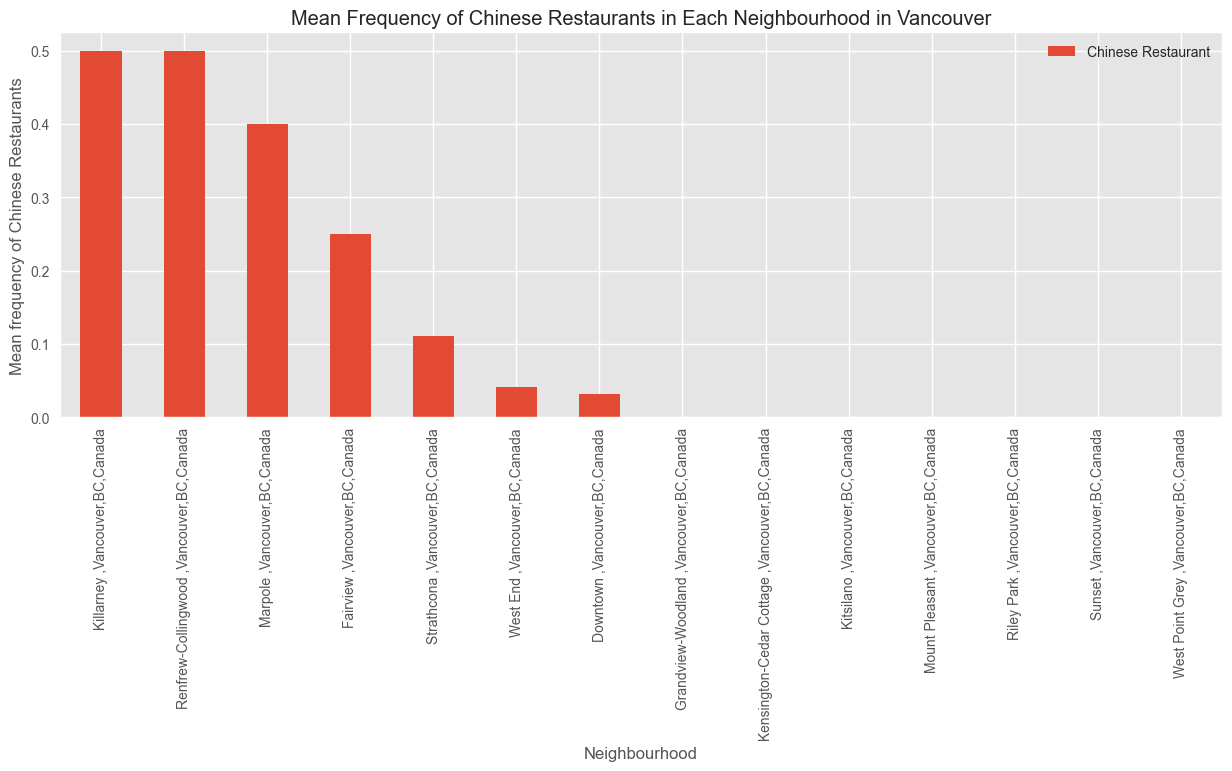

In [622]:
# sort by descending order
vancouver_grouped.sort_values(by='Chinese Restaurant', ascending=False, inplace=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
vancouver_grouped.plot(kind='bar', figsize=(15,5))

plt.title('Mean Frequency of Chinese Restaurants in Each Neighbourhood in Vancouver')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean frequency of Chinese Restaurants')

plt.show()

In [623]:
# Plotting a bar graph to illustrate the distribution of Chinese population group in each neighbourhood

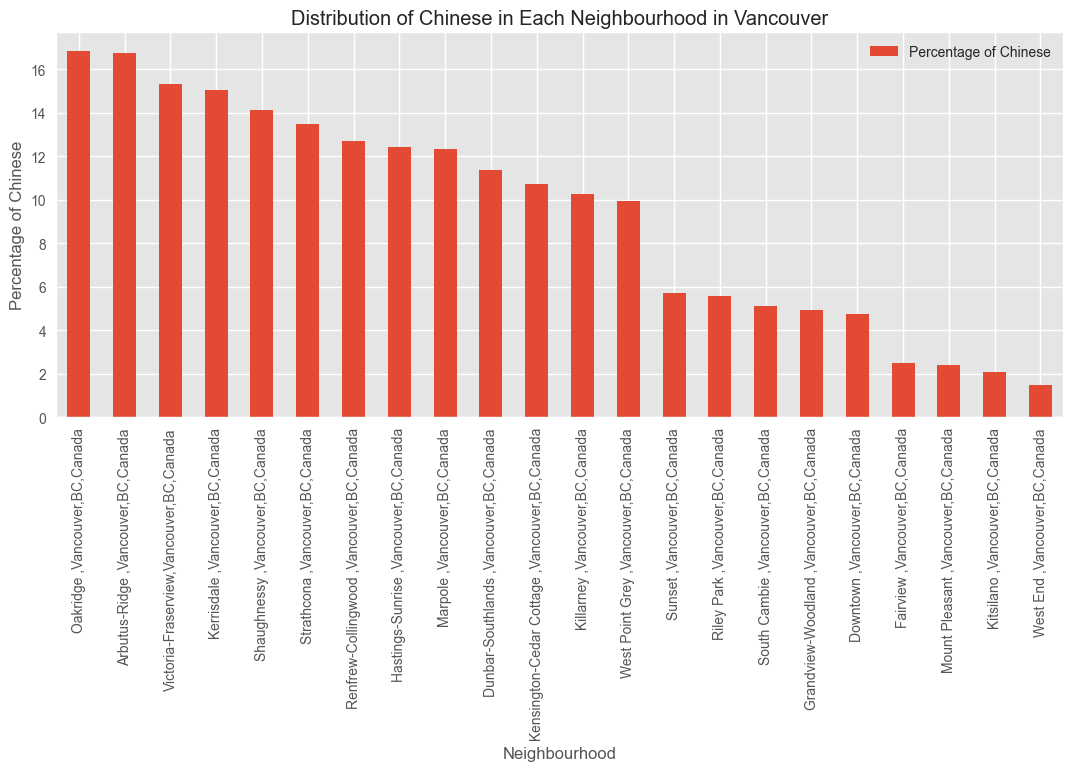

In [624]:
df_ethnic = df_new[['Neighbourhood', 'Percentage of Chinese']].set_index('Neighbourhood')

# sort by descending order
df_ethnic.sort_values(by='Percentage of Chinese', ascending=False, inplace=True)

#plot bar graph
df_ethnic.plot(kind='bar', figsize=(13,5))
plt.title('Distribution of Chinese in Each Neighbourhood in Vancouver')
plt.xlabel('Neighbourhood')
plt.ylabel('Percentage of Chinese')

plt.show()

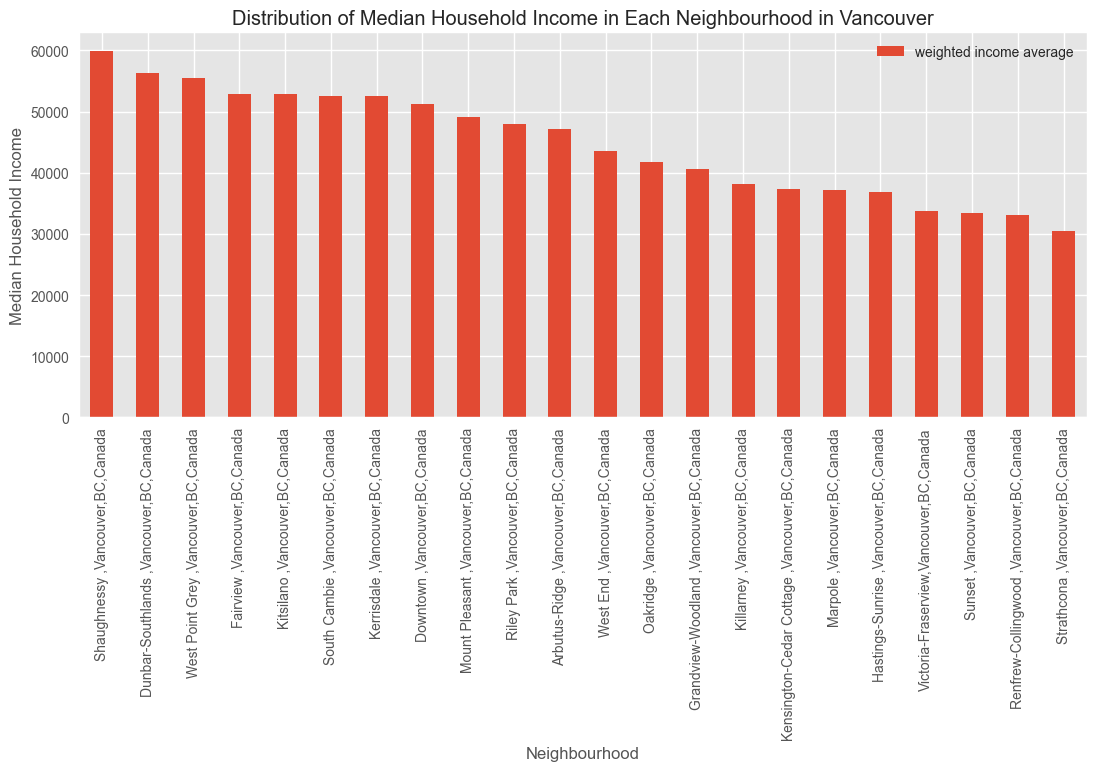

In [625]:
df_income = df_new[['Neighbourhood', 'weighted income average']].set_index('Neighbourhood')

# sort by descending order
df_income.sort_values(by='weighted income average', ascending=False, inplace=True)

#plot bar graph
df_income.plot(kind='bar', figsize=(13,5))
plt.title('Distribution of Median Household Income in Each Neighbourhood in Vancouver')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Household Income')

plt.show()

In [646]:
df_chinese = df_new[['Neighbourhood','lat','long','Percentage of Chinese', 'weighted income average']]
df_chinese.reset_index(inplace = True, drop = True)
df_chinese.head()

,Neighbourhood,lat,long,Percentage of Chinese,weighted income average
0,"Arbutus-Ridge ,Vancouver,BC,Canada",49.246213,-123.161262,16.75063,47217.03198
1,"Downtown ,Vancouver,BC,Canada",49.283393,-123.117456,4.766669,51284.256208
2,"Dunbar-Southlands ,Vancouver,BC,Canada",49.237069,-123.184365,11.384615,56365.998515
3,"Fairview ,Vancouver,BC,Canada",49.261956,-123.130351,2.479123,52891.735782
4,"Grandview-Woodland ,Vancouver,BC,Canada",49.277139,-123.066901,4.955154,40686.166299


In [647]:
# finalise dataframe
df_final = pd.merge(df_chinese, vancouver_grouped, on='Neighbourhood')
df_final = df_final[["Neighbourhood","lat","long","weighted income average","Percentage of Chinese","Chinese Restaurant"]]
df_final.head()

,Neighbourhood,lat,long,weighted income average,Percentage of Chinese,Chinese Restaurant
0,"Downtown ,Vancouver,BC,Canada",49.283393,-123.117456,51284.256208,4.766669,0.032258
1,"Fairview ,Vancouver,BC,Canada",49.261956,-123.130351,52891.735782,2.479123,0.250000
2,"Grandview-Woodland ,Vancouver,BC,Canada",49.277139,-123.066901,40686.166299,4.955154,0.000000
3,"Kensington-Cedar Cottage ,Vancouver,BC,Canada",49.247632,-123.084207,37351.52864,10.718138,0.000000
4,"Killarney ,Vancouver,BC,Canada",49.224274,-123.046250,38091.365462,10.251642,0.500000


In [648]:
# Cluster Neighbourhoods
from sklearn.preprocessing import StandardScaler
import numpy as np
X = df_final.values[:,3:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.00802528, -0.5483412 , -0.52440935],
       [ 1.20591194, -1.09502673,  0.6311322 ],
       [-0.29663863, -0.5032965 , -0.69560069],
       [-0.70714481,  0.87396128, -0.69560069],
       [-0.61606817,  0.7624765 ,  1.9578651 ],
       [ 1.19668459, -1.19318465, -0.69560069],
       [-0.73226756,  1.25703006,  1.42717194],
       [ 0.73189841, -1.1139612 , -0.69560069],
       [-1.24099849,  1.34569023,  1.9578651 ],
       [ 0.60115907, -0.35503456, -0.69560069],
       [-1.54602625,  1.53665892, -0.10594163],
       [-1.19438807, -0.32669291, -0.69560069],
       [ 0.0614133 , -1.33183848, -0.47447854],
       [ 1.5284394 ,  0.69155923, -0.69560069]])

In [649]:
df_normalized = pd.DataFrame(Clus_dataSet)
df_normalized.rename(columns={0:'weighted income average', 1:'% Chinese', 2:'No. of Chinese Restaurants'}, inplace=True)
df_normalized.head()

,weighted income average,% Chinese,No. of Chinese Restaurants
0,1.008025,-0.548341,-0.524409
1,1.205912,-1.095027,0.631132
2,-0.296639,-0.503297,-0.695601
3,-0.707145,0.873961,-0.695601
4,-0.616068,0.762477,1.957865


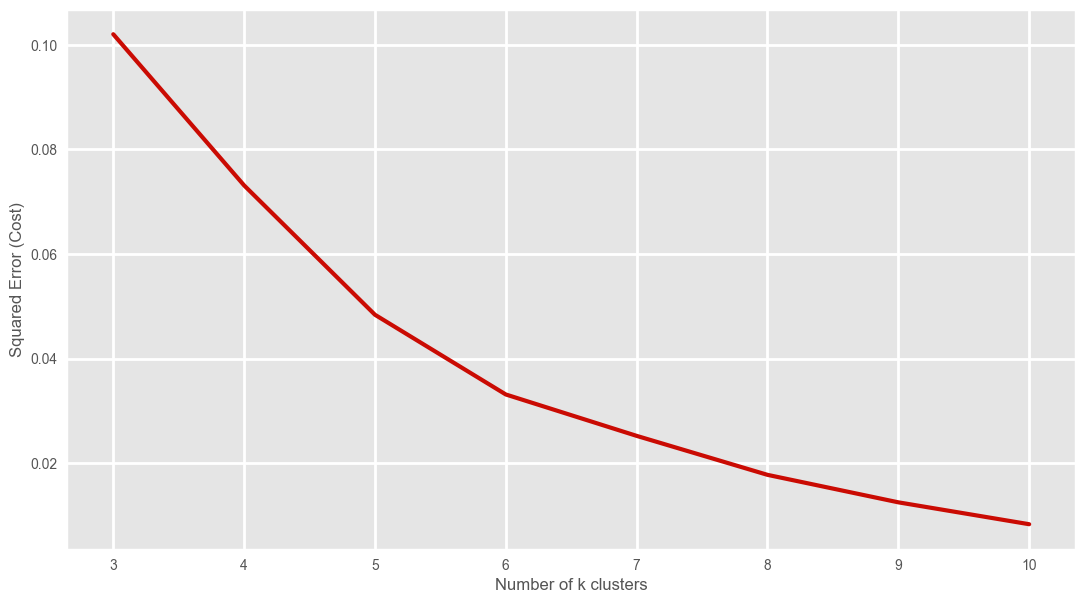

In [650]:
from sklearn.cluster import KMeans

error_cost=[]

for i in range(3, 11):
  KM = KMeans(n_clusters=i, max_iter=100)
  try:
    KM.fit(df_normalized)

  except ValueError:
    print('Error on line', i)

  # calculate squared error for the clustered points
  error_cost.append(KM.inertia_ / 100)

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(3,11), error_cost, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show()

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=10), k=(3, 11))

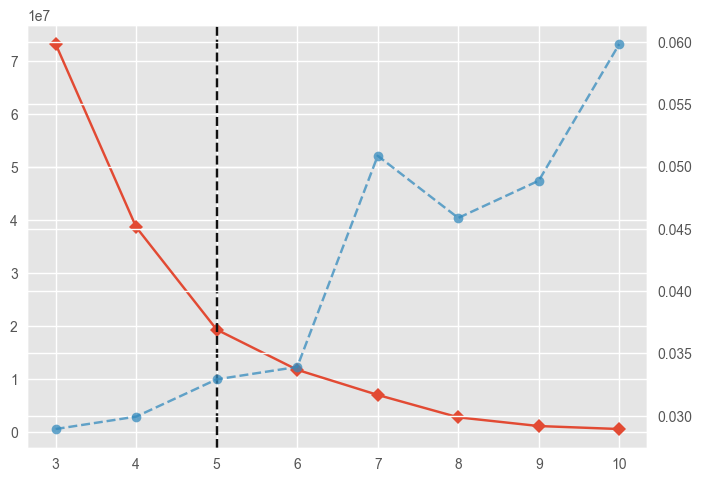

In [651]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11))

visualizer.fit(X)
visualizer

In [652]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_normalized)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 3, 1, 0, 1, 0, 1, 0])

In [653]:
df_normalized.drop(['weighted income average','% Chinese'], axis=1, inplace=True)
df_clustered = pd.merge(df_chinese, df_normalized, left_index=True, right_index=True)
df_clustered.insert(0, 'Cluster Label', kmeans.labels_)

In [654]:
df_clustered

,Cluster Label,Neighbourhood,lat,long,Percentage of Chinese,weighted income average,No. of Chinese Restaurants
0,0,"Arbutus-Ridge ,Vancouver,BC,Canada",49.246213,-123.161262,16.75063,47217.03198,-0.524409
1,0,"Downtown ,Vancouver,BC,Canada",49.283393,-123.117456,4.766669,51284.256208,0.631132
2,2,"Dunbar-Southlands ,Vancouver,BC,Canada",49.237069,-123.184365,11.384615,56365.998515,-0.695601
3,3,"Fairview ,Vancouver,BC,Canada",49.261956,-123.130351,2.479123,52891.735782,-0.695601
4,1,"Grandview-Woodland ,Vancouver,BC,Canada",49.277139,-123.066901,4.955154,40686.166299,1.957865
5,0,"Hastings-Sunrise ,Vancouver,BC,Canada",49.278752,-123.040006,12.424674,36934.324866,-0.695601
6,1,"Kensington-Cedar Cottage ,Vancouver,BC,Canada",49.247632,-123.084207,10.718138,37351.52864,1.427172
7,0,"Kerrisdale ,Vancouver,BC,Canada",49.220985,-123.159548,15.03017,52571.375603,-0.695601
8,1,"Killarney ,Vancouver,BC,Canada",49.224274,-123.046250,10.251642,38091.365462,1.957865
9,0,"Kitsilano ,Vancouver,BC,Canada",49.269410,-123.155267,2.068392,52816.779837,-0.695601


In [655]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color schemes for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_clustered['lat'], df_clustered['long'], df_clustered['Neighbourhood'], df_clustered['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [ ]:
# examine clusters

In [656]:
# Cluster 0
df_clustered.loc[df_clustered['Cluster Label'] == 0]

,Cluster Label,Neighbourhood,lat,long,Percentage of Chinese,weighted income average,No. of Chinese Restaurants
0,0,"Arbutus-Ridge ,Vancouver,BC,Canada",49.246213,-123.161262,16.75063,47217.03198,-0.524409
1,0,"Downtown ,Vancouver,BC,Canada",49.283393,-123.117456,4.766669,51284.256208,0.631132
5,0,"Hastings-Sunrise ,Vancouver,BC,Canada",49.278752,-123.040006,12.424674,36934.324866,-0.695601
7,0,"Kerrisdale ,Vancouver,BC,Canada",49.220985,-123.159548,15.03017,52571.375603,-0.695601
9,0,"Kitsilano ,Vancouver,BC,Canada",49.269410,-123.155267,2.068392,52816.779837,-0.695601
12,0,"Oakridge ,Vancouver,BC,Canada",49.230829,-123.131134,16.852709,41807.756464,-0.474479


In [657]:
df_clustered.loc[df_clustered['Cluster Label'] == 1]

,Cluster Label,Neighbourhood,lat,long,Percentage of Chinese,weighted income average,No. of Chinese Restaurants
4,1,"Grandview-Woodland ,Vancouver,BC,Canada",49.277139,-123.066901,4.955154,40686.166299,1.957865
6,1,"Kensington-Cedar Cottage ,Vancouver,BC,Canada",49.247632,-123.084207,10.718138,37351.52864,1.427172
8,1,"Killarney ,Vancouver,BC,Canada",49.224274,-123.046250,10.251642,38091.365462,1.957865


In [658]:
# Cluster 2
df_clustered.loc[df_clustered['Cluster Label'] == 2]

,Cluster Label,Neighbourhood,lat,long,Percentage of Chinese,weighted income average,No. of Chinese Restaurants
2,2,"Dunbar-Southlands ,Vancouver,BC,Canada",49.237069,-123.184365,11.384615,56365.998515,-0.695601
11,2,"Mount Pleasant ,Vancouver,BC,Canada",49.263330,-123.096588,2.399894,49041.213064,-0.695601


In [659]:
# Cluster 3
df_clustered.loc[df_clustered['Cluster Label'] == 3]

,Cluster Label,Neighbourhood,lat,long,Percentage of Chinese,weighted income average,No. of Chinese Restaurants
3,3,"Fairview ,Vancouver,BC,Canada",49.261956,-123.130351,2.479123,52891.735782,-0.695601
10,3,"Marpole ,Vancouver,BC,Canada",49.209223,-123.136150,12.321048,37147.45062,-0.105942


In [660]:
# Cluster 4
df_clustered.loc[df_clustered['Cluster Label'] == 4]

,Cluster Label,Neighbourhood,lat,long,Percentage of Chinese,weighted income average,No. of Chinese Restaurants
13,4,"Renfrew-Collingwood ,Vancouver,BC,Canada",49.248495,-123.040353,12.692037,33014.910426,-0.695601
